## DATA606 Capstone Project - PART II: Literature Review and EDA

## Credit Risk Analysis and Prediction of Loan Defaults
The dataset existed in the open source kaggle.com website through the link: https://www.kaggle.com/wendykan/lending-club-loan-data 
- Lending Club Loan Dataset contain complete loan data for all loans issued through the year 2007 to 2015 
- Dataset Size: 2 GB
- Actual number of records: 887 thousand 
- Actual number of columns: 74


In [56]:
# Import required libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
pd.set_option('display.max_rows', None,'display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from pandas.tools.plotting import scatter_matrix
import pandas.plotting
matplotlib.use('Agg')
import matplotlib.pyplot as plt
sns.set(color_codes=True)
from scipy import stats

### 1. Load and study the data

In [3]:
df = pd.read_csv(r'C:\Users\mhaile\Desktop\files\UMBC\DATA606\loan.csv', low_memory=False)

In [4]:
# Have a look at to top 5 of the dataset
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# dimension of the data
df.shape

(887379, 74)

In [6]:
# List of columns 
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

### 2. Data Cleaning and Transformation

In [7]:
# percentage of missing values
df.isnull().sum()
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False)

dti_joint                      99.942640
verification_status_joint      99.942415
annual_inc_joint               99.942415
il_util                        97.902024
mths_since_rcnt_il             97.654892
all_util                       97.591559
max_bal_bc                     97.591559
open_rv_24m                    97.591559
open_rv_12m                    97.591559
total_cu_tl                    97.591559
total_bal_il                   97.591559
open_il_24m                    97.591559
open_il_12m                    97.591559
open_il_6m                     97.591559
open_acc_6m                    97.591559
inq_fi                         97.591559
inq_last_12m                   97.591559
desc                           85.797726
mths_since_last_record         84.555303
mths_since_last_major_derog    75.015974
mths_since_last_delinq         51.197065
next_pymnt_d                   28.507661
total_rev_hi_lim                7.919502
tot_cur_bal                     7.919502
tot_coll_amt    

In [8]:
def get_percentage_missing(series):
    """ Calculates percentage of NaN values in DataFrame
    :param series: Pandas DataFrame object
    :return: float
    """
    num = series.isnull().sum()
    den = len(series)
    return round(num/den, 2)

#Drop columns with null value >=50%
for name, values in df.iteritems():
    #print("%r: %r" % (name, values) )
    if get_percentage_missing(df[name]) >= 0.50:
        #print("Deleting Column %r: " % (name) )
        df.drop(name, axis=1, inplace=True)

In [9]:
print(len(df.columns))

53


In [10]:
# List of columns
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

Lending club provides more features for each loan after they are funded, however they provide a much small number of features to potential investors. Since we are developing a tool for investors, all features not provided to investors should be eliminated except those that reference the loan outcome: 'loan_status' 

In [11]:
df = df.drop(['id', 'member_id', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d','policy_code', 'application_type',
      'tot_coll_amt','tot_cur_bal', 'total_rev_hi_lim', 'funded_amnt'], axis = 1)

 Drop additional columns which are redundant 

- funded_amnt; loan_amnt and funded_amnt  are redundant
- funded_amount_inv; the difference between funded_amnt and funded_amnt_inv is the amount invested by Lending Club and this is not relevant to predicting default
- url; provides no additonal useful info
- payment_plan; only relevent after loan has been issued
- zip_code; we will not have zip code level data


In [12]:

df = df.drop([ 'funded_amnt_inv', 'url', 'pymnt_plan', 'zip_code'], axis = 1)

In [13]:
len(df.columns)

27

In [14]:
# The remaining columns
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_rec_prncp', 'collections_12_mths_ex_med', 'acc_now_delinq'],
      dtype='object')

In [15]:
# a function to get unique values in each column
def uniq_per_col(df,count):
    for this_column in df.columns:
        print("\n==== ",this_column,"has",df[this_column].nunique(),"unique entries ====")
        print(df[this_column].value_counts().head(count))

In [16]:
uniq_per_col(df,20)


====  loan_amnt has 1372 unique entries ====
10000.0    61837
12000.0    50183
15000.0    47210
20000.0    46932
35000.0    36368
8000.0     27870
5000.0     27167
6000.0     26207
25000.0    24125
16000.0    23708
24000.0    22323
18000.0    22136
30000.0    17588
28000.0    14909
7000.0     14135
14000.0    13363
21000.0    12060
9000.0     11144
4000.0     10524
3000.0      9714
Name: loan_amnt, dtype: int64

====  term has 2 unique entries ====
 36 months    621125
 60 months    266254
Name: term, dtype: int64

====  int_rate has 542 unique entries ====
10.99    34624
9.17     25720
15.61    25201
9.99     21553
7.89     20311
13.99    19076
12.69    18783
12.29    18603
12.99    18540
17.57    18001
8.18     17813
13.33    17568
16.99    16464
11.53    16183
11.99    15447
14.65    14768
18.25    11507
8.90     11424
16.55    10955
6.03     10755
Name: int_rate, dtype: int64

====  installment has 68711 unique entries ====
327.34    2610
318.79    2142
491.01    1785
392.81    17

0.0       3402
5235.0      74
5466.0      72
4479.0      68
6223.0      67
8696.0      67
6969.0      67
8073.0      66
5849.0      66
5853.0      66
5407.0      65
5249.0      65
5514.0      64
6838.0      64
8708.0      64
7792.0      63
5886.0      63
6994.0      63
5365.0      63
5430.0      63
Name: revol_bal, dtype: int64

====  revol_util has 1356 unique entries ====
0.0     3540
58.0    1780
53.0    1766
59.0    1765
61.0    1757
57.0    1722
62.0    1720
52.0    1709
55.0    1699
63.0    1697
60.0    1693
54.0    1690
48.0    1675
47.0    1654
65.0    1652
50.0    1649
56.0    1636
51.0    1627
64.0    1626
66.0    1621
Name: revol_util, dtype: int64

====  total_rec_prncp has 260227 unique entries ====
0.0        18145
10000.0    14688
12000.0    11589
15000.0     9674
20000.0     8728
8000.0      7238
6000.0      7233
5000.0      6728
35000.0     6014
16000.0     4925
18000.0     4474
25000.0     3959
7000.0      3940
24000.0     3668
4000.0      3337
14000.0     3213
9000.0

 ## 2.1. Handle missing values

In [17]:
# counting the number of remaining missing values
null_counts = df.isnull().sum()

# displaying results 
null_counts[null_counts != 0]

emp_title                     51462
emp_length                    44825
annual_inc                        4
title                           152
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_util                      502
collections_12_mths_ex_med      145
acc_now_delinq                   29
dtype: int64

In [18]:
df.dtypes

loan_amnt                     float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
purpose                        object
title                          object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_rec_prncp               float64
collections_12_mths_ex_med    float64
acc_now_deli

In [19]:
# Catagorical variables impute with mode
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])
df['title'] = df['title'].fillna(df['title'].mode()[0])
df['earliest_cr_line'] = df['earliest_cr_line'].fillna(df['earliest_cr_line'].mode()[0])


In [20]:
# Continuous variales impute with median
df['annual_inc'].fillna(value=df['annual_inc'].median(), inplace = True)
df['open_acc'].fillna(value=df['open_acc'].median(), inplace = True)
df['pub_rec'].fillna(value=df['pub_rec'].median(), inplace = True)
df['delinq_2yrs'].fillna(value=df['delinq_2yrs'].median(), inplace = True)
df['inq_last_6mths'].fillna(value=df['inq_last_6mths'].median(), inplace = True)
df['revol_util'].fillna(value=df['revol_util'].median(), inplace = True)
df['collections_12_mths_ex_med'].fillna(value=df['collections_12_mths_ex_med'].median(), inplace = True)
df['acc_now_delinq'].fillna(value=df['acc_now_delinq'].median(), inplace = True)


In [21]:
# re-check percentage of missing values and clean
df.isnull().sum()
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values()

loan_amnt                     0.000000
total_rec_prncp               0.000000
revol_util                    0.000000
revol_bal                     0.000000
pub_rec                       0.000000
open_acc                      0.000000
inq_last_6mths                0.000000
earliest_cr_line              0.000000
delinq_2yrs                   0.000000
dti                           0.000000
addr_state                    0.000000
title                         0.000000
collections_12_mths_ex_med    0.000000
purpose                       0.000000
issue_d                       0.000000
verification_status           0.000000
annual_inc                    0.000000
home_ownership                0.000000
emp_length                    0.000000
sub_grade                     0.000000
grade                         0.000000
installment                   0.000000
int_rate                      0.000000
term                          0.000000
loan_status                   0.000000
acc_now_delinq           

All missing values have been handeled.

## 2.2 Cleaning features and target variable "loan_status"
- Because our objective is to forecast probability of default and impact of default, we need to more thoroughly understand the  column 'loan_status'

In [22]:
df['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

- Filter our dataset based on the target variable "loan_status" 

In [23]:
# Filter rows based on loan_status field
df = df[(df['loan_status'] == 'Fully Paid')|
        (df['loan_status'] == 'Charged Off')|
        (df['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid')|
        (df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off')|
        (df['loan_status'] == 'Default')|
        (df['loan_status'] == 'Late (31-120 days)')|
        (df['loan_status'] == 'Late (16-30 days)')
         ]


- In order to increase the predictive power of our model, the target variable "loan_status" classified for any loan that were defaulted, were charged off, or were late on payments as "Default", while we classified any loan that was fully paid was classified as "Fully Paid".Because it is the risk of default as a result of borrowers failing to make required payments leading to loose of principal and interest.   

In [24]:
df['loan_status'] = df[['loan_status']].replace( 'Does not meet the credit policy. Status:Fully Paid','Fully Paid')
df['loan_status'] = df[['loan_status']].replace('Does not meet the credit policy. Status:Charged Off','Default')
df['loan_status'] = df[['loan_status']].replace('Charged Off','Default')
df['loan_status'] = df[['loan_status']].replace('Late (31-120 days)','Default')
df['loan_status'] = df[['loan_status']].replace('Late (16-30 days)','Default')

In [25]:
# unique values of "loan_status"
df['loan_status'].value_counts()

Fully Paid    209711
Default        61176
Name: loan_status, dtype: int64

In [26]:
# cleaning "emp_length" field
df['emp_length'] = df.emp_length.str.replace('+','')
df['emp_length'] = df.emp_length.str.replace('<','')
df['emp_length'] = df.emp_length.str.replace('years','')
df['emp_length'] = df.emp_length.str.replace('year','')
df['emp_length'] = df.emp_length.str.replace(' ','')
df['emp_length'] = df.emp_length.str.replace(' ','')
df['emp_length'] = df.emp_length.fillna(value=0)

In [27]:
df['emp_length'] = df['emp_length'].astype('int64')

In [28]:
df.emp_length.unique()

array([10,  1,  3,  9,  4,  5,  6,  2,  7,  8], dtype=int64)

## 3. Exploratory Data Analysis (EDA)

In [29]:
df.describe()

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_rec_prncp,collections_12_mths_ex_med,acc_now_delinq
count,270887.000000,270887.000000,270887.000000,270887.000000,2.708870e+05,270887.000000,270887.000000,270887.000000,270887.000000,270887.000000,2.708870e+05,270887.000000,270887.000000,270887.000000,270887.000000
mean,13628.407971,13.891907,419.542856,6.064215,7.239949e+04,16.698684,0.258525,0.885753,10.975990,0.147187,1.530901e+04,54.525460,11032.161935,0.007328,0.003396
std,8164.469951,4.413615,245.562691,3.518715,5.834734e+04,7.861082,0.759783,1.154699,4.928385,0.444536,1.975312e+04,24.757062,8330.958819,0.093150,0.063284
min,500.000000,5.320000,15.670000,1.000000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7375.000000,10.990000,240.990000,3.000000,4.500000e+04,10.850000,0.000000,0.000000,7.000000,0.000000,5.843000e+03,36.550000,4567.825000,0.000000,0.000000
50%,12000.000000,13.670000,366.200000,6.000000,6.200000e+04,16.360000,0.000000,1.000000,10.000000,0.000000,1.091800e+04,56.000000,9600.000000,0.000000,0.000000
75%,18500.000000,16.780000,548.710000,10.000000,8.700000e+04,22.190000,0.000000,1.000000,14.000000,0.000000,1.908700e+04,74.000000,15350.000000,0.000000,0.000000
max,35000.000000,28.990000,1424.570000,10.000000,8.706582e+06,57.140000,29.000000,33.000000,76.000000,15.000000,1.746716e+06,892.300000,35000.030000,6.000000,5.000000


In [30]:
df.corr()

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_rec_prncp,collections_12_mths_ex_med,acc_now_delinq
loan_amnt,1.000000,0.215164,0.954720,0.096972,0.338412,0.055013,0.011538,-0.007926,0.203185,-0.072463,0.318449,0.102624,0.738124,-0.000458,0.014342
int_rate,0.215164,1.000000,0.205549,0.028649,-0.026965,0.177413,0.091325,0.201605,0.041744,0.081808,0.017646,0.332997,0.000623,0.030298,0.031794
installment,0.954720,0.205549,1.000000,0.087231,0.333755,0.054500,0.022313,0.008749,0.197904,-0.062349,0.310615,0.130311,0.730375,0.001273,0.016500
emp_length,0.096972,0.028649,0.087231,1.000000,0.053128,0.056770,0.027459,-0.015110,0.040552,0.056235,0.083814,0.037536,0.074327,0.004511,0.012416
annual_inc,0.338412,-0.026965,0.333755,0.053128,1.000000,-0.172283,0.051186,0.051107,0.142454,-0.017649,0.304528,0.025039,0.299359,0.003282,0.016172
dti,0.055013,0.177413,0.054500,0.056770,-0.172283,1.000000,0.000214,-0.009468,0.309726,-0.031459,0.145716,0.218553,-0.035261,0.005284,0.010376
delinq_2yrs,0.011538,0.091325,0.022313,0.027459,0.051186,0.000214,1.000000,0.020794,0.058125,-0.004434,-0.031399,-0.017804,-0.015957,0.047927,0.116866
inq_last_6mths,-0.007926,0.201605,0.008749,-0.015110,0.051107,-0.009468,0.020794,1.000000,0.103057,0.045511,-0.005640,-0.088330,-0.035697,-0.000419,-0.004895
open_acc,0.203185,0.041744,0.197904,0.040552,0.142454,0.309726,0.058125,0.103057,1.000000,-0.010632,0.223632,-0.109328,0.145106,0.018002,0.019625
pub_rec,-0.072463,0.081808,-0.062349,0.056235,-0.017649,-0.031459,-0.004434,0.045511,-0.010632,1.000000,-0.100958,-0.066583,-0.075036,0.026641,0.006507


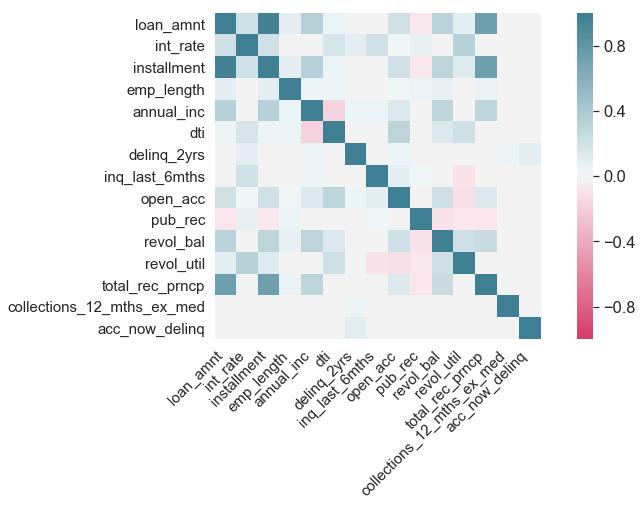

In [53]:
# plot correleation matrix to view countinuous variable correlation
plt.figure(figsize = (13,6))
corr = df.corr()
sns.set(font_scale=1.5)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(0, 220, n=200),annot_kws={'size':10},
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    ax.tick_params(labelsize=15),
    rotation=45,
    horizontalalignment='right'
    
);

<Figure size 936x504 with 0 Axes>

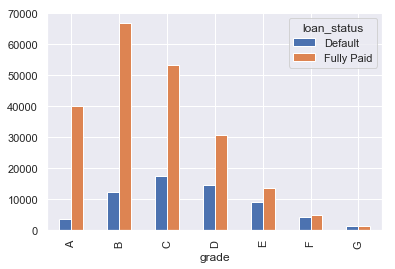

In [41]:
plt.figure(figsize = (13,7))
df.groupby(['grade', 'loan_status']).size().unstack().plot(kind='bar', stacked=False)

- This bar plot shows that grade have predicting power over who will be defaulted. The ratio of default increases with higher grade

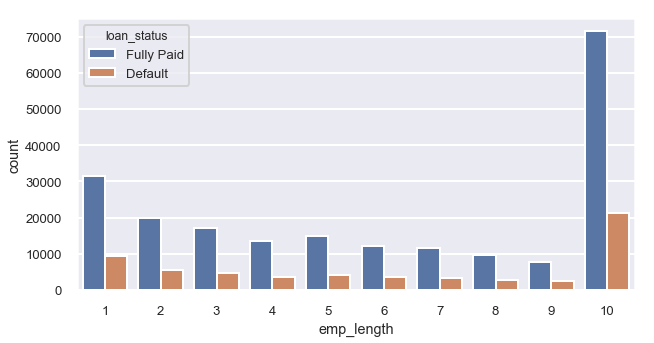

In [33]:

plt.figure(figsize = (10,5))
sns.set_context("poster", font_scale=0.6)
sns.countplot(x='emp_length', hue='loan_status', data=df)

- In general, the loan_status shows proportional increase with employment length

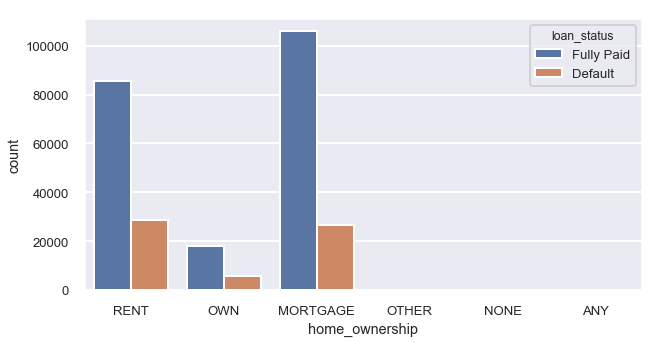

In [34]:
plt.figure(figsize = (10,5))
sns.set_context("poster", font_scale=0.6)
sns.countplot(x='home_ownership', hue='loan_status', data=df,)

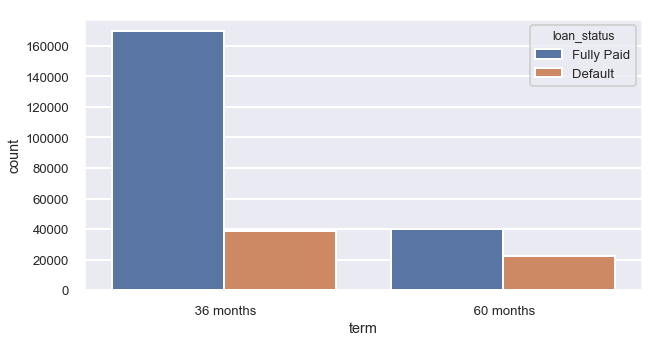

In [35]:
plt.figure(figsize = (10,5))
sns.set_context("poster", font_scale=0.6)
sns.countplot(x='term', hue='loan_status', data=df,)

- The ratio of default is higher for loan term 60 months than 36 months, this shows that term has strong correlation with loan_status

<Figure size 720x360 with 0 Axes>

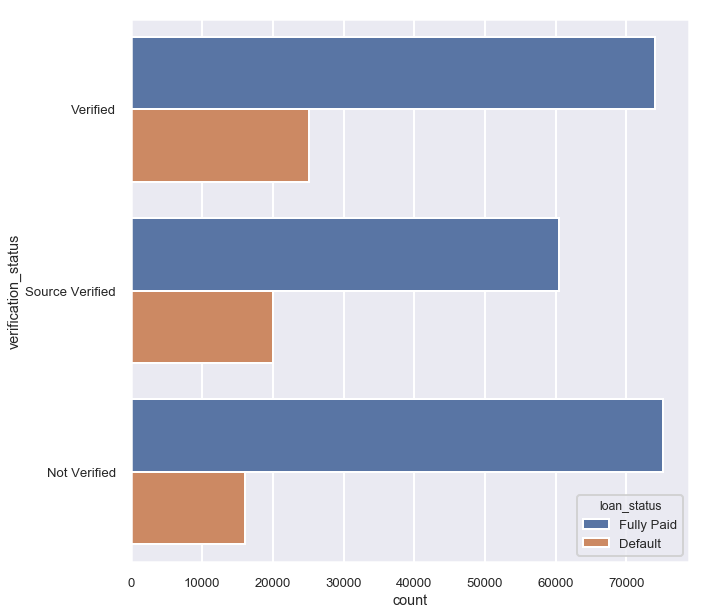

In [36]:
plt.figure(figsize = (10,5))
sns.set_context("poster", font_scale=0.6)                                                  
plt.figure(figsize=(10, 10))                                                                                                                                                                                                                                 
plt.ylabel('Loan Originating State')
sns.countplot(y='verification_status', hue='loan_status', data=df)

C:\Users\mhaile\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\mhaile\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


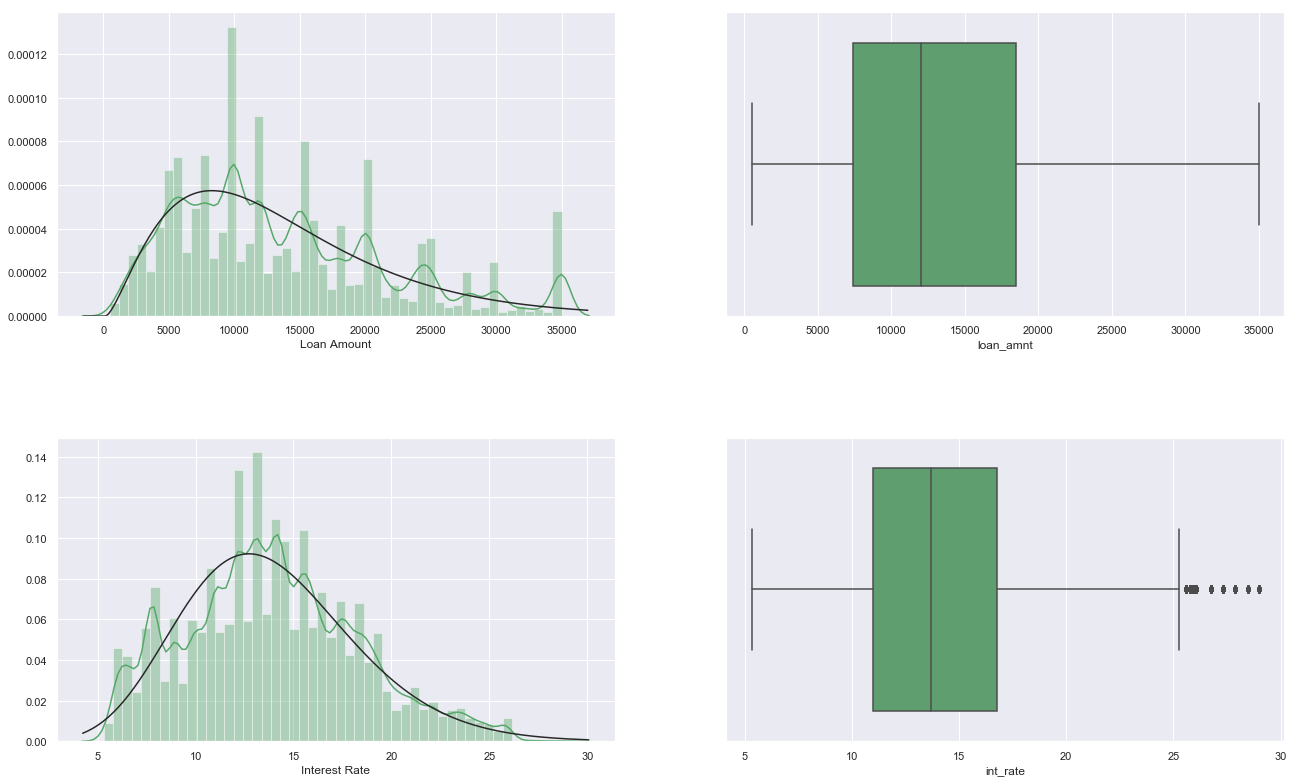

In [37]:
# co

fig, ax =plt.subplots(2,2, figsize=(22,15))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

# Loan amount distribution plots
sns.distplot(df.loan_amnt, fit=stats.gamma, axlabel="Loan Amount", label="Loan Amount Frequency distribution", ax=ax[0][0], color="g")
sns.boxplot(x=df.loan_amnt, ax=ax[0][1],  color="g")

# Interest rates distribution plots
sns.distplot(df.int_rate, fit=stats.gamma, axlabel="Interest Rate", label="Interest Frequency distribution", ax=ax[1][0],  color="g")
sns.boxplot(x=df.int_rate, ax=ax[1][1],  color="g")

fig.show()


C:\Users\mhaile\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


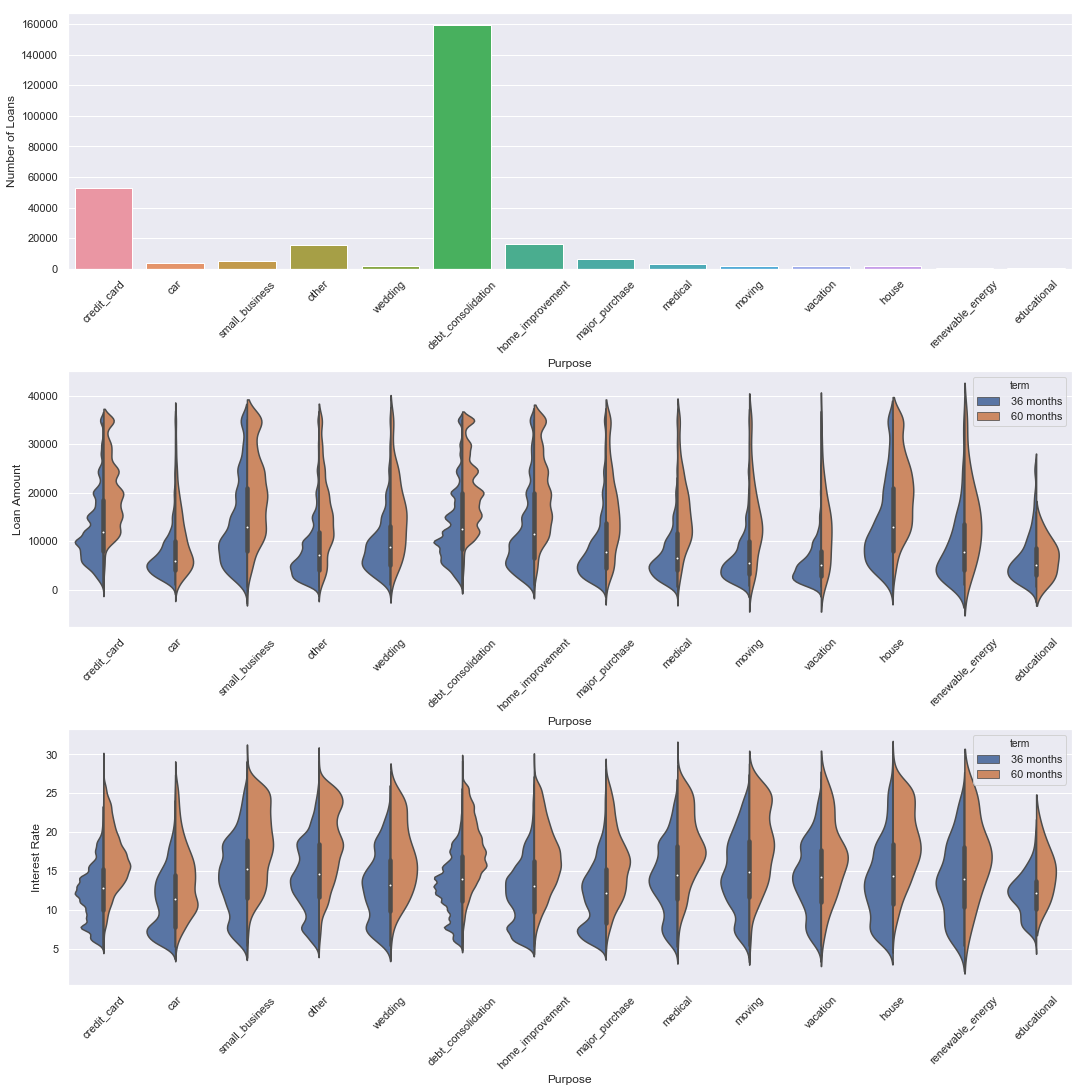

In [38]:
fig, ax=plt.subplots(3,1,figsize=(18,20))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

s0 = sns.countplot(x="purpose",data=df,ax=ax[0])
s0.set(xlabel='Purpose',ylabel='Number of Loans')
s0.set_xticklabels(s0.get_xticklabels(),rotation=45)

s1 = sns.violinplot(x="purpose",y="loan_amnt",data=df, ax=ax[1], hue="term", split=True)
s1.set(xlabel='Purpose',ylabel='Loan Amount')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)

s2 = sns.violinplot(x="purpose",y="int_rate",data=df, ax=ax[2], hue="term", split=True)
s2.set(xlabel='Purpose',ylabel='Interest Rate')
s2.set_xticklabels(s2.get_xticklabels(),rotation=45)


plt.show()

fig.savefig("LoanByPurpose.pdf")